<a href="https://colab.research.google.com/github/Aellima/Portif-lio-projetos/blob/main/Finan%C3%A7as_e_Investimentos_bitcoin_Aelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Entendimento do problema

## O projeto visa indicar qual perfil de investidor é mais adequado com base no comportamento do mercado de bitcoin. 

1.1 - Quais são os perfis de investidores?

- Conservadores, moderados e arrojados.

1.1.2 - Quais a bases fundamentais dos perfis? 

- Segurança
- Liquidez
- Rentabilidade

1.1.3 - Como influenciam no perfil dos investidores?


1.1.4 - Quais são os indicadores determinantes para a tomada de decisão?
- OBV - On Balance Volume
- Move average crossover





#2 - Coleta de dados e referências do projeto

Conjunto de dados utilizado:

 https://www.kaggle.com/mczielinski/bitcoin-historical-data

Referências:

https://www.notion.so/https-towardsdatascience-com-dynamic-cryptocurrency-trading-backtesting-platform-python-219dfcd742-eb894aef1a504d6fb363e3854f870350

https://towardsdatascience.com/basic-time-series-analysis-and-trading-strategy-with-bitcoin-price-data-1a8f1a30f11


# 3 - Análise, interpretação e Visualização 


Bibliotecas utilizadas


In [ ]:
#manipulação de dados
import pandas as pd
import numpy as np
from scipy.stats import norm


#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
df=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


Primeria inspecção dos dados 


In [ ]:
#cinco primeiras observações do dataframe
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Inspecionando o tamanho do dataframe
df.size

38859016

In [ ]:
#Inspecionando a forma do df.
df.shape

(4857377, 8)

In [ ]:
df.loc[df["Volume_(BTC)"]==1098.3493842]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4404691,1589987700,9724.89,9724.89,9100.0,9685.57,1098.349384,1.044599e+07,9510.6238


In [ ]:
#Informações iniciais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
#verificando o tipo dos dados
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [ ]:
#obtendo informações estatísticas iniciais. 
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [ ]:
#Menores valores do bitcoin no presente conjunto de dados 
df.min()

Timestamp            1.325318e+09
Open                 3.800000e+00
High                 3.800000e+00
Low                  1.500000e+00
Close                1.500000e+00
Volume_(BTC)         0.000000e+00
Volume_(Currency)    0.000000e+00
Weighted_Price       3.800000e+00
dtype: float64

In [ ]:
#Maiores valores do bitcoin no presente conjunto de dados
df.max() 

Timestamp            1.617149e+09
Open                 6.176356e+04
High                 6.178183e+04
Low                  6.167355e+04
Close                6.178180e+04
Volume_(BTC)         5.853852e+03
Volume_(Currency)    1.390067e+07
Weighted_Price       6.171621e+04
dtype: float64

In [ ]:
#dados faltantes, total de 1243608 observações em branco.
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

#Mudando formato da feature Timestamp

O modo como a feature se apresenta não é funcional para o interesse desse projeto. Mudando para o formato Y-m-d e o nome da feature. 


In [ ]:
#mudando a feature timestamp para formato dd/mm/aa
df["Timestamp"]=pd.to_datetime(df["Timestamp"], unit="s")



In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [ ]:
df["Timestamp"].dtype

dtype('<M8[ns]')

In [ ]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"], format= "%Y-%m-%d")


In [ ]:
#Tipo do dado foi alterado
df.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

Correlção


In [ ]:
#correlação entre as features
corr=df.corr()
corr

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
Low,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
Close,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
Volume_(BTC),-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
Volume_(Currency),0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
Weighted_Price,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

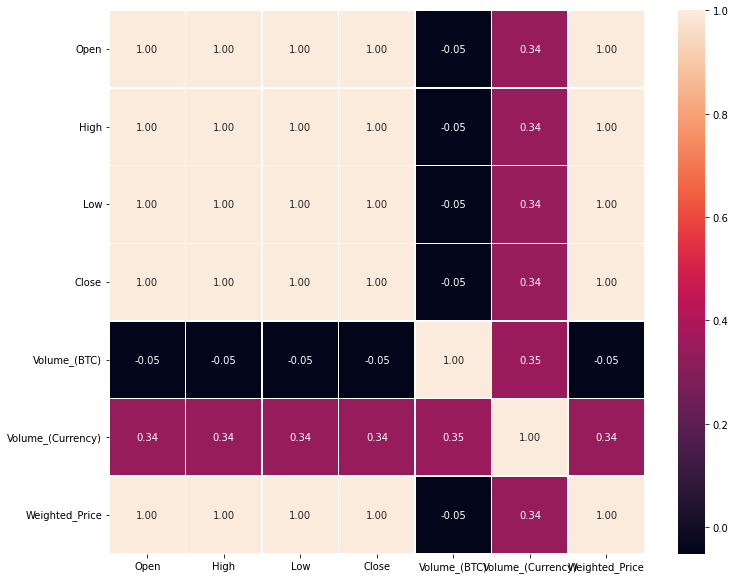

In [ ]:
plt.figure(figsize=(12,10))
corr
sns.heatmap(data=corr, annot=True, linewidths=0.5, fmt=".2f",cmap="rocket")
plt.xticks(rotation=0)

#Correlação entre as features.

1 - Open, high, low e close têm entre si grande correlação. (esperado).

2 - BTC e  CURRENCY têm moderada correlação entre si, baixa com as demais features. 

3 - WEIGHTED PRICE tem alta correlação com as features open, high, low e close. E baixa com as features BTC E CURRENCY. 





##Dicionário de dados

1 - Timestamp - Hora de início da janela. Janelas de 60s em unidade de time unix. Tipo - int. Alterado para datetime.

2 - Open - Valor de abertura no início da janela. Tipo de dado - float.

3 - High - Valor mais alto durante a janela. Tipo de dado - float.

4 - Low - Valor mais baixo durante a janela. Tipo de dado - float. 

5 - Close - Valor no fechamento da janela. Tipo de dado - float. 

6 - Volume BTC - Volume de bitcoin transacionado na respectiva janela. Tipo de dado - float.

7 - Volume currency - Volume da moeda correspondente (dólar) transacionada nesta janela. Tipo de dado - float.

8 - Weighted Price - VWAP - Preço médio ponderado por volume. É obtido da razão entre o somatório do produto do número de bitcoin comprado pelo preço, e o total de bitcoin comprado. Tipo de dado - float.  

#Dados faltantes e duplicatas.

A abordagem adotada com relação aos NaN presentes no conjunto de dados foi de, a princípio, não leva-los em consideração deste ponto em diante. Devido ao fato de serem apenas dados faltantes que não deverão influenciar no presente projeto.




#Percentual de dados faltantes

O conjunto de dados tem 25,6% de dados faltantes.

In [ ]:
#Verificando de dados faltantes no conjunto de dados 
df.isnull()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
4857372,False,False,False,False,False,False,False,False
4857373,False,False,False,False,False,False,False,False
4857374,False,False,False,False,False,False,False,False
4857375,False,False,False,False,False,False,False,False


In [ ]:
#Quantidade de dados faltantes por feature
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
#Separando colunas e linhas do df
df.shape

(4857377, 8)

In [ ]:
#Salvando as informações de linhas e colunas em variáveis para melhor manipulação 
linhas, colunas = df.shape

In [ ]:
#Verificando o percentual de dados faltantes no df e salvando numa respectiva variável
percentual_faltantes = (df.isnull().sum()/linhas)*100

In [ ]:
percentual_faltantes

Timestamp             0.00000
Open                 25.60246
High                 25.60246
Low                  25.60246
Close                25.60246
Volume_(BTC)         25.60246
Volume_(Currency)    25.60246
Weighted_Price       25.60246
dtype: float64

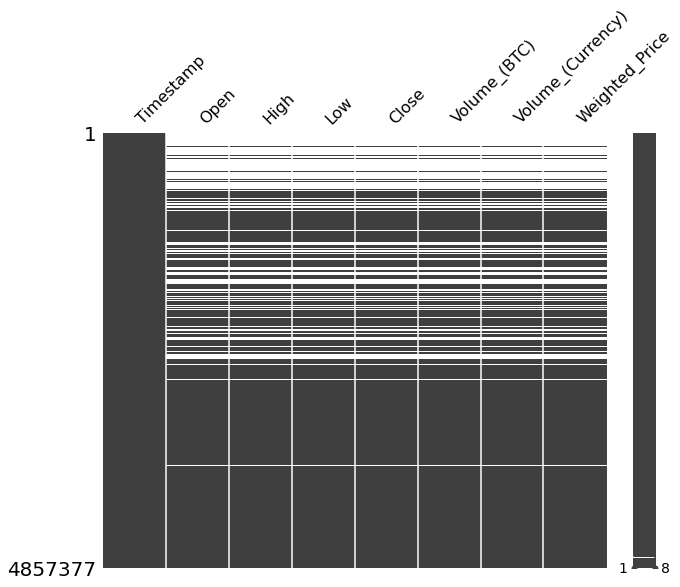

In [ ]:
#Visualizando os dados faltantes
msno.matrix(df, figsize=(10,8))

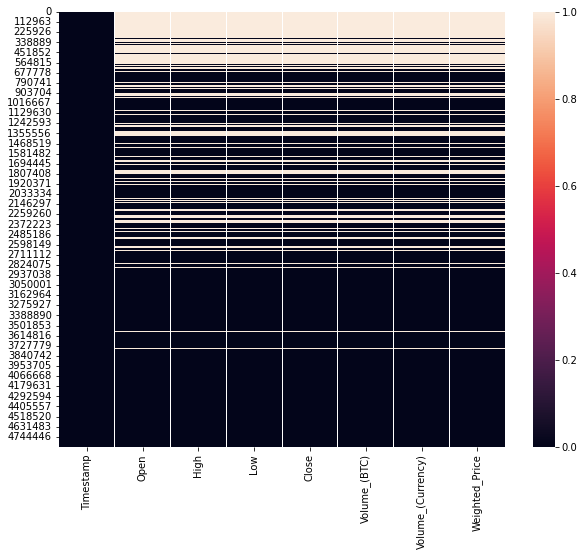

In [ ]:
#Visualizando com mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [ ]:
#Cópia do df para exclusão dos faltantes.
df_sem_faltantes= df.copy()

In [ ]:
#Df a ser trabalho em diante. 
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Excluindo os dados faltantes (NaN)
df_sem_faltantes.dropna(inplace=True)

In [ ]:
#Nova forma (tamanho) do dataframe
df_sem_faltantes.shape

(3613769, 8)

In [ ]:
#Forma do novo dataframe sem os dados faltantes 
df_sem_faltantes.size

28910152

In [ ]:
#Verificando
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
df_sem_faltantes.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [ ]:
#Verificando em todo o dataframe.
df_sem_faltantes.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

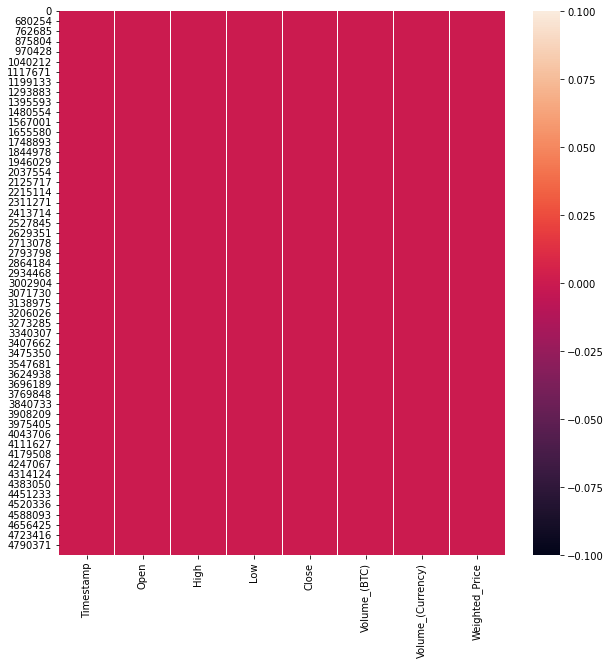

In [ ]:
#Visualizando
plt.figure(figsize=(10,10))
sns.heatmap(df_sem_faltantes.isnull())

In [ ]:
#Verificando para dados duplicados
df_sem_faltantes.duplicated().sum()

0

#Outliers

A estratégia adotada para a detecção de outliers foi a visualização em box plot de uma das features. Contudo, dada a extensão e natureza dos dados, optou-se por realizar as visualizações subsequêntes com uma parcela recente dos dados, que corresponde ao perído de 1 ano,  a fim de evitar discrepâncias desnecessárias. 





In [ ]:
#Recorte dos dados para um perído de 1 ano
df_rec_analise = df_sem_faltantes.loc[df_sem_faltantes["Timestamp"] >= "2020-03-31 00:00:00"]

In [ ]:
df_rec_analise.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4331776,2020-03-31 00:00:00,6408.95,6408.95,6397.52,6397.65,0.369580,2366.046893,6401.994344
4331777,2020-03-31 00:01:00,6399.20,6406.06,6398.80,6405.06,4.053499,25960.527673,6404.473810
4331778,2020-03-31 00:02:00,6409.05,6425.24,6409.05,6425.00,18.707374,120144.266210,6422.294481
4331779,2020-03-31 00:03:00,6417.53,6430.74,6417.53,6426.53,7.164653,46043.367355,6426.461704
4331780,2020-03-31 00:04:00,6426.54,6438.96,6424.46,6438.96,9.050250,58225.624105,6433.592825


In [ ]:
df_rec_analise.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,517943.000000,517943.000000,517943.000000,517943.000000,517943.000000,5.179430e+05,517943.000000
mean,20154.209440,20168.306262,20139.998384,20154.504453,5.940487,1.198988e+05,20154.114103
std,15435.577832,15449.339748,15421.492316,15435.843749,14.866405,3.047994e+05,15434.733011
min,6162.030000,6171.690000,6137.710000,6158.120000,0.000002,1.567074e-02,6148.417195
25%,9506.785000,9510.340000,9503.210000,9507.065000,0.498494,6.548876e+03,9507.402079
50%,11637.450000,11642.000000,11633.190000,11637.680000,1.927910,3.264111e+04,11637.897327
75%,28651.315000,28673.980000,28617.110000,28649.535000,5.682729,1.086887e+05,28644.118704
max,61763.560000,61781.830000,61673.550000,61781.800000,1098.349384,1.390067e+07,61716.205341


In [ ]:
#valores mínimos no conjunto de dados para análise 
df_rec_analise.min()

Timestamp            2020-03-31 00:00:00
Open                             6162.03
High                             6171.69
Low                              6137.71
Close                            6158.12
Volume_(BTC)                    0.000002
Volume_(Currency)               0.015671
Weighted_Price               6148.417195
dtype: object

In [ ]:
#Valores máximos no conjunto de dados para análise 
df_rec_analise.max()

Timestamp            2021-03-31 00:00:00
Open                            61763.56
High                            61781.83
Low                             61673.55
Close                            61781.8
Volume_(BTC)                 1098.349384
Volume_(Currency)           13900672.407
Weighted_Price              61716.205341
dtype: object

**Outliers na feature Open**


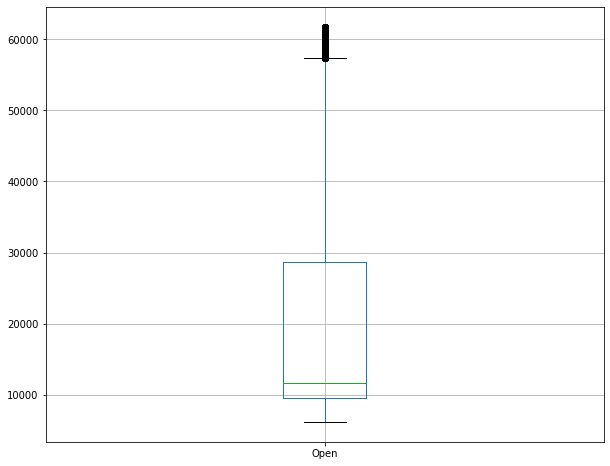

In [ ]:
#Verificando a existência de outliers através de visulização em box plot
plt.figure(figsize=[10,8])
boxplot = df_rec_analise.boxplot(column=['Open'])



In [ ]:
#Calculando intervalo interquartil
q1= df_rec_analise["Open"].quantile(0.25)
q3= df_rec_analise["Open"].quantile(0.75)
IQL= q3 - q1
print(IQL)

19144.530000000002


In [ ]:
#Estabelecendo os limites superior e inferior
LS = q3+1.5*IQL
LI = q1-1.5*IQL
print(LS)
print(LI)

57368.11000000001
-19210.010000000006


In [ ]:
#Verificando os pontos de máximo e mínimo das observações
df_rec_analise["Open"].describe()

count    517943.000000
mean      20154.209440
std       15435.577832
min        6162.030000
25%        9506.785000
50%       11637.450000
75%       28651.315000
max       61763.560000
Name: Open, dtype: float64

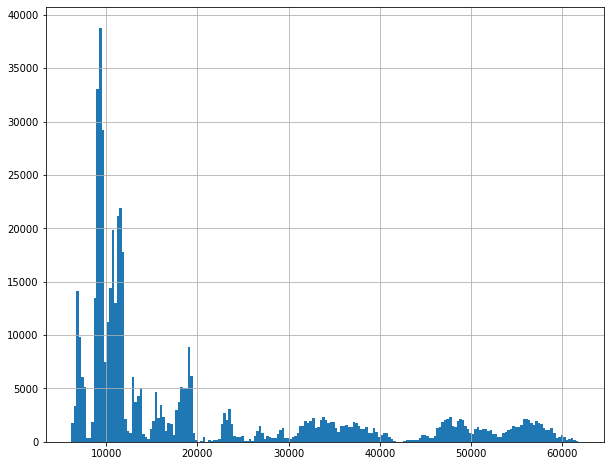

In [ ]:
plt.figure(figsize=(10,8))
df_rec_analise["Open"].hist(bins=200)

In [ ]:
#Visualizando dados discrepantes
dados_discrepantes_open = df_rec_analise["Open"].loc[df_rec_analise["Open"] >= 57368.4425]

In [ ]:
dados_discrepantes_open

4801980    57431.43
4801981    57517.31
4801983    57419.37
4801984    57371.00
4801993    57440.44
             ...   
4857372    58714.31
4857373    58683.97
4857374    58693.43
4857375    58742.18
4857376    58767.75
Name: Open, Length: 11569, dtype: float64

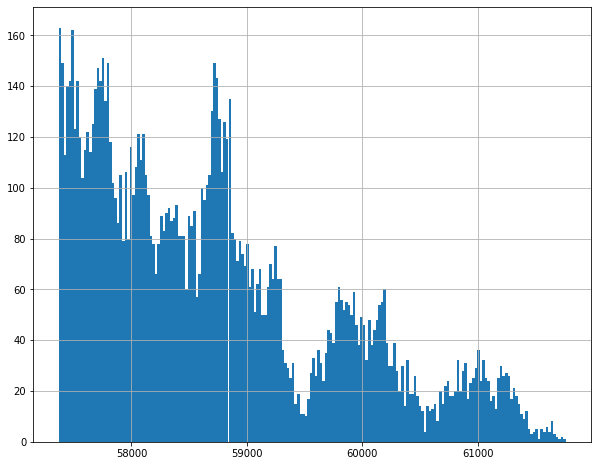

In [ ]:
#Visualizando graficamente os dados discrepantes
plt.figure(figsize=(10,8))
dados_discrepantes_open.hist(bins=200)

**Outliers na feature High**

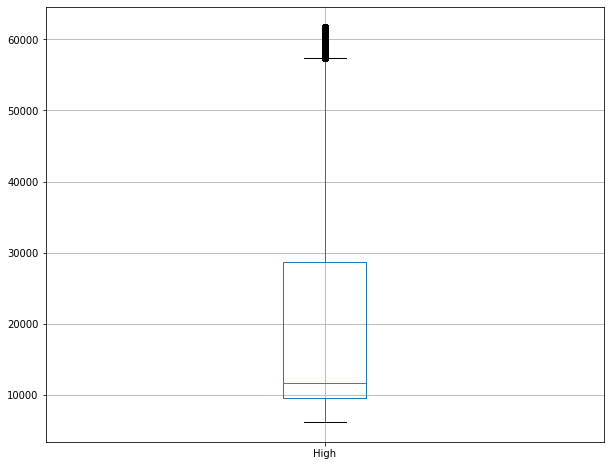

In [ ]:
#Outliers com base na feature high
plt.figure(figsize=[10,8])
boxplot_high=df_rec_analise.boxplot(column=["High"])

In [ ]:
#definindo intervalo interquartílico 
q1= df_rec_analise["High"].quantile(0.25)
q3= df_rec_analise["High"].quantile(0.75)
IQL= q3 - q1
print(IQL)

19163.640000000003


In [ ]:
#definindo os limites superior e inferior
#Os limites são LS=57419.44 e LI=3.80  
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

57419.44000000001
-19235.120000000006


In [ ]:
#Dados discrepantes da feature "High"
dados_discrepantes_high = df_rec_analise["High"].loc[df_rec_analise["High"] >= 57419.44000000001]

In [ ]:
dados_discrepantes_high

4801978    57474.16
4801979    57467.24
4801980    57549.91
4801981    57553.81
4801982    57482.19
             ...   
4857372    58714.31
4857373    58693.43
4857374    58723.84
4857375    58770.38
4857376    58778.18
Name: High, Length: 11418, dtype: float64

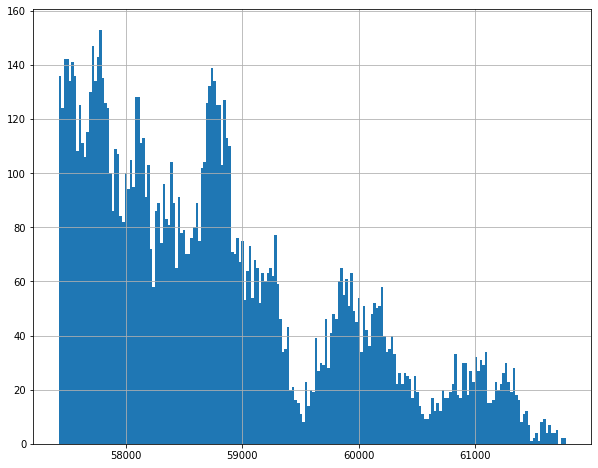

In [ ]:
#Visualizando com histograma
plt.figure(figsize=(10,8))
dados_discrepantes_high.hist(bins=200)

**Outliers para a feature Low**

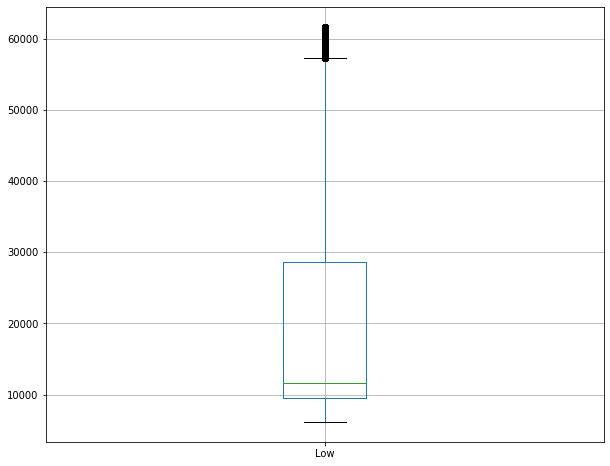

In [ ]:
#Definindo o boxplot para a feature
plt.figure(figsize=[10,8])
boxplot=df_rec_analise.boxplot(column="Low")

In [ ]:
#Definindo intervalo interquartilico 
q3=df_rec_analise["Low"].quantile(0.75)
q1=df_rec_analise["Low"].quantile(0.25)
IQL= q3-q1
IQL

19113.9

In [ ]:
#Limites superior e inferior da feature Low
#Os limites são LS=57287.96000000001, LI=1.50
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

57287.96000000001
-19167.640000000003


In [ ]:
#Dados discprepantes da fearture Low
dados_discrepantes_Low = df_rec_analise["Low"].loc[df_rec_analise["Low"] >= 57287.96000000001]


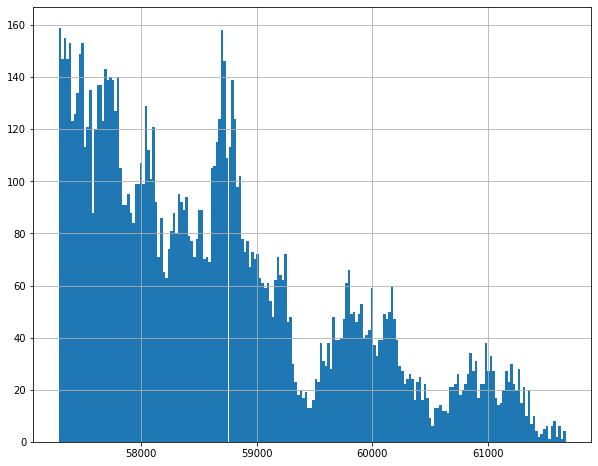

In [ ]:
#Visualisando os dados discrepantes com histograma
plt.figure(figsize=(10,8))
dados_discrepantes_Low.hist(bins=200)

**Outliers para a feature Close**

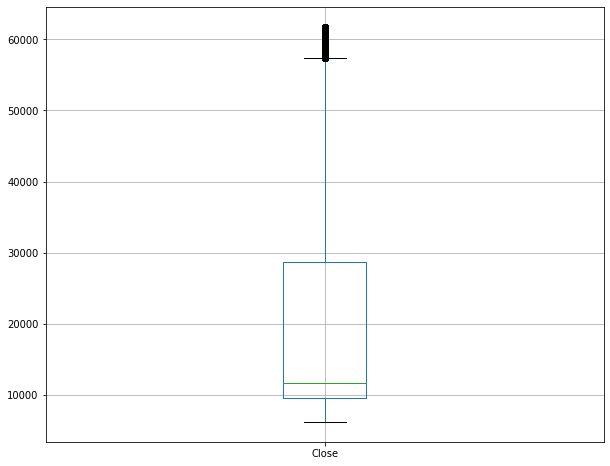

In [ ]:
#Boxplot para a feature close
plt.figure(figsize=[10,8])
boxplot_close=df_rec_analise.boxplot(column="Close")

In [ ]:
#definindo intervalo interquartílico 
q3=df_rec_analise["Close"].quantile(0.75)
q1=df_rec_analise["Close"].quantile(0.25)
IQL = q3-q1
IQL

19142.47

In [ ]:
#Estabelecendo os limites superior e inferior. LS=57363.24, LI=6158.12.
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

57363.240000000005
-19206.640000000003


In [ ]:
#Outliers para a feature Close 
dados_discrepantes_close=df_rec_analise["Close"].loc[df_rec_analise["Close"]>=57363.240000000005]

In [ ]:
#dados discrepantes na feature Close
dados_discrepantes_close

4801979    57434.11
4801980    57515.22
4801982    57411.78
4801983    57371.03
4801985    57380.58
             ...   
4857372    58686.00
4857373    58685.81
4857374    58723.84
4857375    58760.59
4857376    58778.18
Name: Close, Length: 11616, dtype: float64

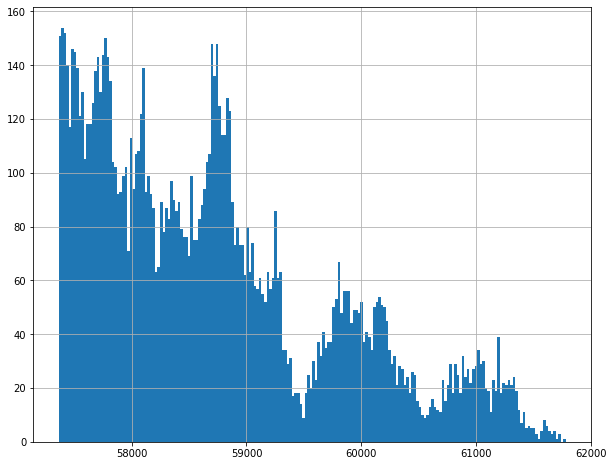

In [ ]:
#Histograma
plt.figure(figsize=[10,8])
dados_discrepantes_close.hist(bins=200)
plt.show()

**Outliers para a feature Volume_(BTC)**

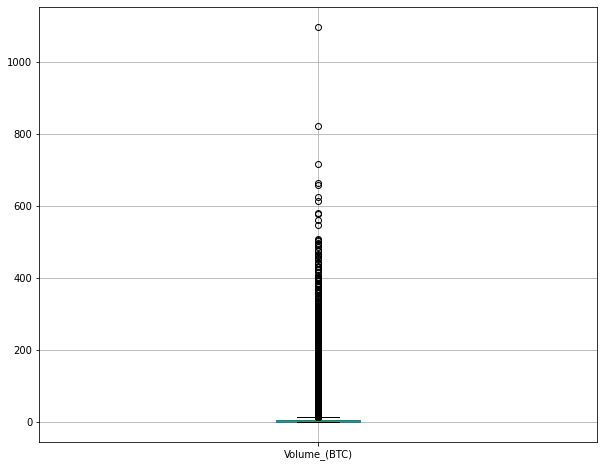

In [ ]:
#Boxplot
plt.figure(figsize=[10,8])
boxplot_VolumeBTC=df_rec_analise.boxplot(column="Volume_(BTC)")


In [ ]:
#Intervalo interquartil 
q3=df_rec_analise["Volume_(BTC)"].quantile(0.75)
q1=df_rec_analise["Volume_(BTC)"].quantile(0.25)
IQL=q3-q1
IQL

5.184235070000001

In [ ]:
#Estabelecendo limites superior e inferior. LS=13.459081675, LI=2.02e-06
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

13.459081675000002
-7.277858605000001


In [ ]:
df_rec_analise["Volume_(BTC)"].max()    

1098.3493842

In [ ]:
df_rec_analise["Volume_(BTC)"].min()

2.02e-06

In [ ]:
#dados discrepantes para a feature Volume_(BTC)
dados_discrepantes_VolumeBTC=df_rec_analise["Volume_(BTC)"].loc[df_rec_analise["Volume_(BTC)"]>=13.459081675]

In [ ]:
dados_discrepantes_VolumeBTC

4331778    18.707374
4331782    20.546321
4331803    28.450407
4331831    18.384845
4331892    28.659927
             ...    
4856896    14.869670
4857024    27.876319
4857025    17.423459
4857030    16.083299
4857359    17.443451
Name: Volume_(BTC), Length: 53189, dtype: float64

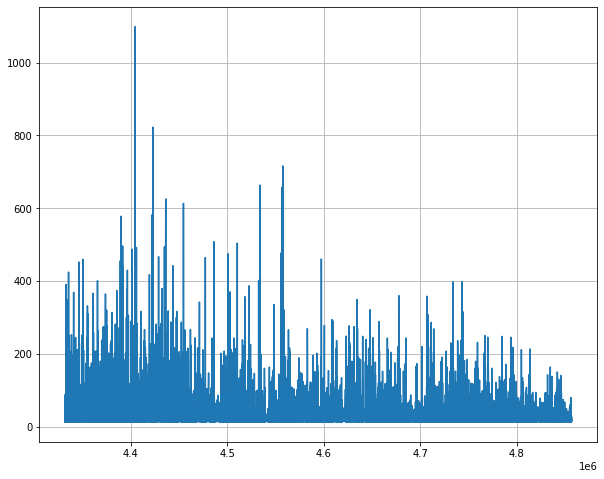

In [ ]:
#Histograma
plt.figure(figsize=[10,8])
dados_discrepantes_VolumeBTC.plot(kind="line", grid=True)
plt.show()

**Outliers da feature Volume_(Currency)**

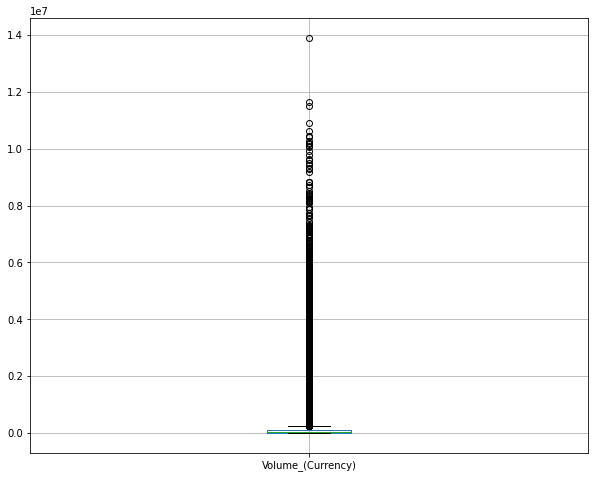

In [ ]:
#boxplot 
plt.figure(figsize=(10,8))
boxplot_VolumeC=df_rec_analise.boxplot(column=["Volume_(Currency)"])

In [ ]:
#intervalo interquartil 
q3=df_rec_analise["Volume_(Currency)"].quantile(0.75)
q1=df_rec_analise["Volume_(Currency)"].quantile(0.25)
IQL=q3-q1
IQL

102139.87098

Muitos outliers nas features de volume. Análise separada?

In [ ]:
#limites. LS=261898.55319500001, LI=0.0156707418
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

261898.55319500001
-146660.930725


In [ ]:
df_rec_analise["Volume_(Currency)"].max()

13900672.407

In [ ]:
df_rec_analise["Volume_(Currency)"].min()

0.0156707418

In [ ]:
#dados discrepantes para a feature Volume_(Currency)
dados_discrepantes_VolumeC=df_rec_analise["Volume_(Currency)"].loc[df_rec_analise["Volume_(Currency)"]>=261898.55319500001]

In [ ]:
dados_discrepantes_VolumeC

4332368    3.393816e+05
4332371    3.436030e+05
4332372    3.338428e+05
4332423    3.264766e+05
4332424    5.707756e+05
               ...     
4857270    3.796297e+05
4857359    1.022333e+06
4857361    6.101536e+05
4857362    6.116325e+05
4857373    4.281581e+05
Name: Volume_(Currency), Length: 57386, dtype: float64

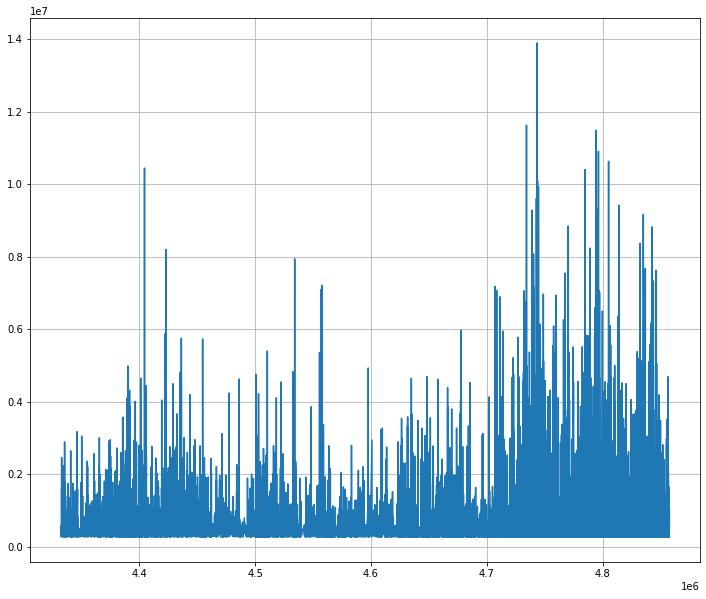

In [ ]:
#visualisando
plt.figure(figsize=(12,10))
dados_discrepantes_VolumeC.plot(kind="line", grid=True)

**Outliers da feature Weighted_Price**

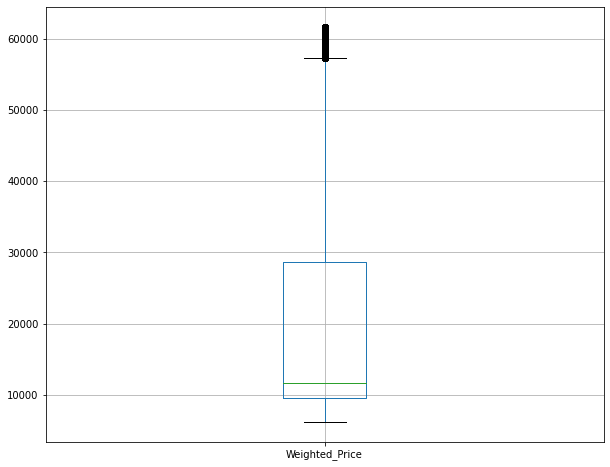

In [ ]:
#Boxplot
plt.figure(figsize=[10,8])
boxplot_Weighted_Price=df_rec_analise.boxplot(column="Weighted_Price")

In [ ]:
#intervalo interquartil 
q3=df_rec_analise["Weighted_Price"].quantile(0.75)
q1=df_rec_analise["Weighted_Price"].quantile(0.25)
IQL=q3-q1
IQL

19136.7166248

In [ ]:
#limites superior e inferior. LS=57349.1936412, LI=6148.417195
LS=q3+1.5*IQL
LI=q1-1.5*IQL
print(LS)
print(LI)

57349.1936412
-19197.672857999998


In [ ]:
#Dados discrepantes
dados_discrepantes_Weighted_Price=df_rec_analise["Weighted_Price"].loc[df_rec_analise["Weighted_Price"]>=57349.1936412]


In [ ]:
dados_discrepantes_Weighted_Price

4801978    57401.019507
4801979    57394.408526
4801980    57503.365779
4801981    57475.037453
4801982    57429.726218
               ...     
4857372    58692.753339
4857373    58693.226508
4857374    58696.198496
4857375    58761.866202
4857376    58764.349363
Name: Weighted_Price, Length: 11678, dtype: float64

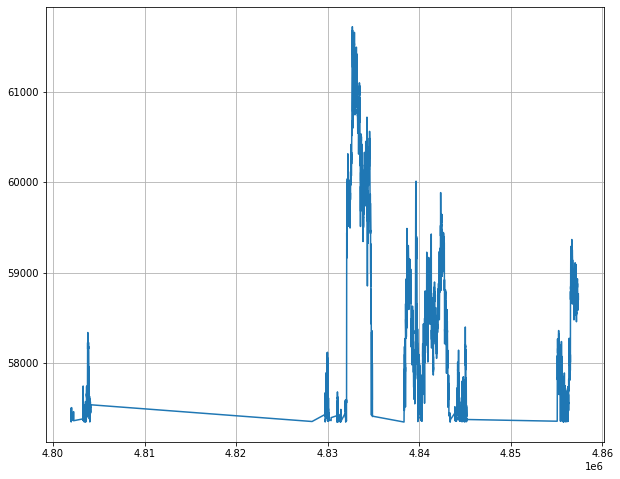

In [ ]:
#Visualização
plt.figure(figsize=[10,8])
dados_discrepantes_Weighted_Price.plot( grid=True)
plt.show()

#Análise das features

Date_time:
  Hora de início da janela. Janelas de 60s em unidade de time unix inicialmente, modificado para o formato data e hora. Com intervalos de 60s entre as observações. 

In [ ]:
df_rec_analise["Timestamp"]

4331776   2020-03-31 00:00:00
4331777   2020-03-31 00:01:00
4331778   2020-03-31 00:02:00
4331779   2020-03-31 00:03:00
4331780   2020-03-31 00:04:00
                  ...        
4857372   2021-03-30 23:56:00
4857373   2021-03-30 23:57:00
4857374   2021-03-30 23:58:00
4857375   2021-03-30 23:59:00
4857376   2021-03-31 00:00:00
Name: Timestamp, Length: 517943, dtype: datetime64[ns]

In [ ]:
#Verificando o tipo
df_rec_analise["Timestamp"].dtypes

dtype('<M8[ns]')

In [ ]:
#Verificando dados faltantes
df_rec_analise["Timestamp"].isnull().sum()

0

In [ ]:
#Informações estátisticas sobre a feature
df_rec_analise["Timestamp"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  517943
unique                 517943
top       2020-03-31 00:00:00
freq                        1
first     2020-03-31 00:00:00
last      2021-03-31 00:00:00
Name: Timestamp, dtype: object

#Open

Valor de abertura da janela. 


In [ ]:
df_rec_analise["Open"]

4331776     6408.95
4331777     6399.20
4331778     6409.05
4331779     6417.53
4331780     6426.54
             ...   
4857372    58714.31
4857373    58683.97
4857374    58693.43
4857375    58742.18
4857376    58767.75
Name: Open, Length: 517943, dtype: float64

In [ ]:
#Informações estatísticas iniciais
df_rec_analise["Open"].describe()

count    517943.000000
mean      20154.209440
std       15435.577832
min        6162.030000
25%        9506.785000
50%       11637.450000
75%       28651.315000
max       61763.560000
Name: Open, dtype: float64

In [ ]:
#Mediana
df_rec_analise["Open"].median()

11637.45

In [ ]:
#Verificando para dados faltantes 
df_rec_analise["Open"].isnull().sum()

0

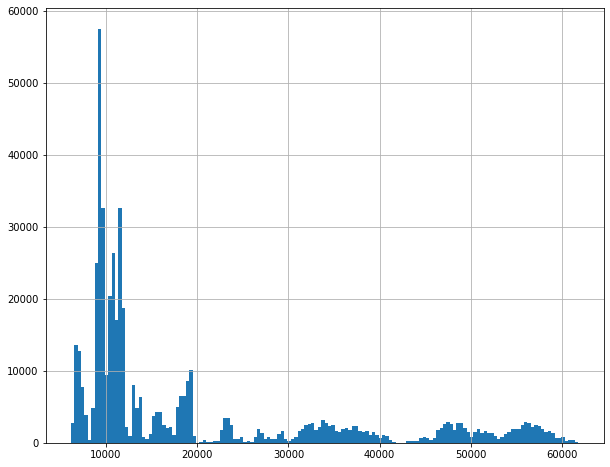

In [ ]:
#Histograma
df_rec_analise["Open"].hist(bins=150, figsize=(10,8))

In [ ]:
#Verificando a curtose da distribuição 
df_rec_analise["Open"].kurtosis()

0.2341877398100105

In [ ]:
#Verificando a simetria da distribuição 
df_rec_analise["Open"].skew()

1.2809163653114048

In [ ]:
#visualizando a distribuição com a densidade de probabilidade. (pdf)
x_list=np.linspace(df_rec_analise.Open.min(),df_rec_analise.Open.max(), 100)
y_list=norm.pdf(x_list,loc=df_rec_analise.Open.mean(), scale=df_rec_analise.Open.std())

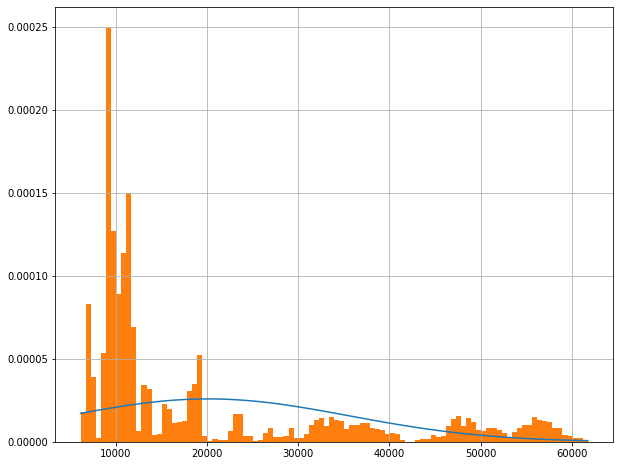

In [ ]:
plt.plot(x_list,y_list)
df_rec_analise["Open"].hist(bins=100, figsize=(10,8), density=True)




In [ ]:
#Valores mais frequêntes de abertura
df_rec_analise["Open"].value_counts()

11350.00    63
9170.00     62
9150.00     60
11400.00    53
9175.00     52
            ..
10789.13     1
10788.72     1
10780.61     1
10783.39     1
58767.75     1
Name: Open, Length: 393224, dtype: int64

#High

Maior valor obtido durante a janela. 

In [ ]:
df_rec_analise["High"]

4331776     6408.95
4331777     6406.06
4331778     6425.24
4331779     6430.74
4331780     6438.96
             ...   
4857372    58714.31
4857373    58693.43
4857374    58723.84
4857375    58770.38
4857376    58778.18
Name: High, Length: 517943, dtype: float64

In [ ]:
df_rec_analise["High"].describe()

count    517943.000000
mean      20168.306262
std       15449.339748
min        6171.690000
25%        9510.340000
50%       11642.000000
75%       28673.980000
max       61781.830000
Name: High, dtype: float64

In [ ]:
#Maior valor dentre os máximos num intervalo de 1 ano.
df_rec_analise["High"].max()

61781.83

In [ ]:
#Valor 3x maior que a média do ano. Algum evento atípico?
df_rec_analise["High"].max()/df_rec_analise["High"].mean()

3.0633127639883027

In [ ]:
df_rec_analise.loc[df_rec_analise["High"] == 61781.83]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4832698,2021-03-13 20:42:00,61763.56,61781.83,61657.88,61719.74,2.461103,151889.96095,61716.205341


NOTA:
2021-03-13 aprovado pacote de estímulos de 1,9 trilhão do governo Biden.


In [ ]:
#Menor valor máximo do preço de bitcoin no último ano.
df_rec_analise["High"].min()

6171.69

In [ ]:
df_rec_analise.loc[df_rec_analise["High"] == 6171.69]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4334226,2020-04-01 16:50:00,6171.69,6171.69,6137.71,6158.12,110.355978,678514.59289,6148.417195


2020-04-01: INÍCIO DA PANDEMIA DE COVID. 


In [ ]:
#Valores mais frequêntes de máximo no intervalo de 1 ano. 
df_rec_analise["High"].value_counts()

11350.00    74
9700.00     73
11400.00    69
11362.14    64
9500.00     63
            ..
10727.47     1
10731.76     1
10727.78     1
10729.75     1
58770.38     1
Name: High, Length: 385989, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


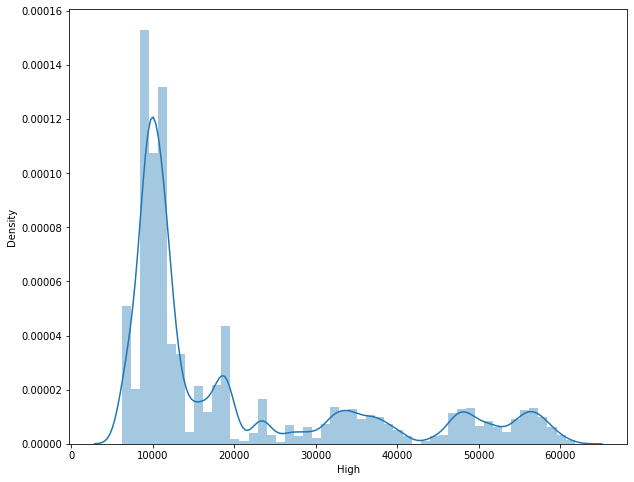

In [ ]:
#Visulisando 
plt.figure(figsize=[10,8])
sns.distplot(df_rec_analise["High"])

In [ ]:
#Calculando a curtose
df_rec_analise["High"].kurtosis()

0.23218243401364802

In [ ]:
#Calculando a assimetria 
df_rec_analise["High"].skew()

1.2804167290575998

In [ ]:
#Valores únicos na feature High
df_rec_analise["High"].nunique()

385989

In [ ]:
df_rec_analise.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

#Low

 Low - Valor mais baixo durante a janela. Tipo de dado - float.



In [ ]:
df_rec_analise["Low"]

4331776     6397.52
4331777     6398.80
4331778     6409.05
4331779     6417.53
4331780     6424.46
             ...   
4857372    58686.00
4857373    58683.97
4857374    58693.43
4857375    58742.18
4857376    58755.97
Name: Low, Length: 517943, dtype: float64

In [ ]:
df_rec_analise["Low"].describe()

count    517943.000000
mean      20139.998384
std       15421.492316
min        6137.710000
25%        9503.210000
50%       11633.190000
75%       28617.110000
max       61673.550000
Name: Low, dtype: float64

In [ ]:
df_rec_analise["Low"].dtypes

dtype('float64')

In [ ]:
#Valor mais baixo atingido no intervalo de 1 ano
df_rec_analise["Low"].min()


6137.71

In [ ]:
df_rec_analise["Low"].value_counts()

9600.00     74
9100.00     68
11350.00    66
9150.00     66
9170.00     65
            ..
10733.51     1
10739.98     1
10731.21     1
10731.77     1
58755.97     1
Name: Low, Length: 387548, dtype: int64

In [ ]:
df_rec_analise["Low"].unique()

array([ 6397.52,  6398.8 ,  6409.05, ..., 58693.43, 58742.18, 58755.97])

In [ ]:
#Valores únicos no preço
df_rec_analise["Low"].nunique()

387548

In [ ]:
#valores repetidos no preço
df_rec_analise["Low"].duplicated().sum()

130395

In [ ]:
df_rec_analise["Low"].duplicated().value_counts()

False    387548
True     130395
Name: Low, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


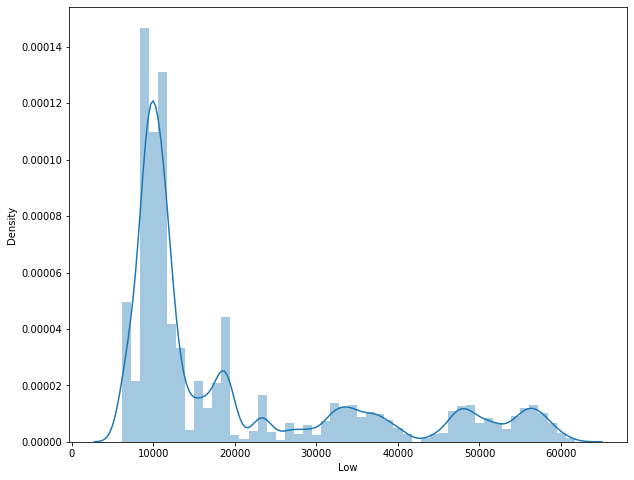

In [ ]:
#Visualisando a distribuição 
plt.figure(figsize=[10,8])
sns.distplot(df_rec_analise["Low"])

##Close

Valor no fechamento da janela. Tipo de dado - float.

In [ ]:
df_rec_analise["Close"]

4331776     6397.65
4331777     6405.06
4331778     6425.00
4331779     6426.53
4331780     6438.96
             ...   
4857372    58686.00
4857373    58685.81
4857374    58723.84
4857375    58760.59
4857376    58778.18
Name: Close, Length: 517943, dtype: float64

In [ ]:
#Tipo do dado
df_rec_analise["Close"].dtypes

dtype('float64')

In [ ]:
#Informações estatísticas iniciais
df_rec_analise["Close"].describe()

count    517943.000000
mean      20154.504453
std       15435.843749
min        6158.120000
25%        9507.065000
50%       11637.680000
75%       28649.535000
max       61781.800000
Name: Close, dtype: float64

In [ ]:
#Maior valor de fechamento, coincide com o valor da feature High.
df_rec_analise["Close"].max()

61781.8

In [ ]:
df_rec_analise.loc[df_rec_analise["Close"] == 61781.8]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4832697,2021-03-13 20:41:00,61733.94,61781.8,61660.88,61781.8,4.878759,301045.24837,61705.295475


In [ ]:
#Menor valor de fechamento. 
df_rec_analise["Close"].min()

6158.12

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


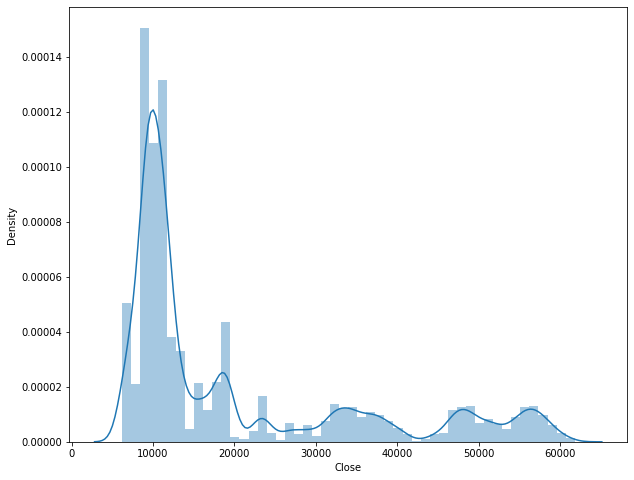

In [ ]:
#visualizando a distribuição com histograma
plt.figure(figsize=[10,8])
sns.distplot(df_rec_analise["Close"])

In [ ]:
#variação percentual entre abertura e fechamento
var_abert_fech=((df_rec_analise["Close"]-df_rec_analise["Open"])/df_rec_analise["Open"])*100

In [ ]:
var_abert_fech

4331776   -0.176316
4331777    0.091574
4331778    0.248867
4331779    0.140241
4331780    0.193261
             ...   
4857372   -0.048217
4857373    0.003135
4857374    0.051812
4857375    0.031340
4857376    0.017748
Length: 517943, dtype: float64

In [ ]:
var_abert_fech

4331776   -0.176316
4331777    0.091574
4331778    0.248867
4331779    0.140241
4331780    0.193261
             ...   
4857372   -0.048217
4857373    0.003135
4857374    0.051812
4857375    0.031340
4857376    0.017748
Length: 517943, dtype: float64

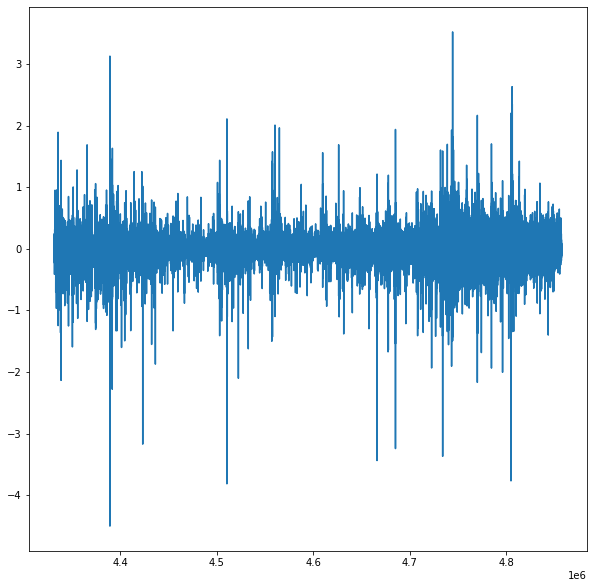

In [ ]:
var_abert_fech.plot(figsize=[10,10])

##Volume_(BTC)

Volume de bitcoin transacionado na respectiva janela. Tipo de dado - float.





In [ ]:
df_rec_analise["Volume_(BTC)"]

4331776     0.369580
4331777     4.053499
4331778    18.707374
4331779     7.164653
4331780     9.050250
             ...    
4857372     1.384487
4857373     7.294848
4857374     1.705682
4857375     0.720415
4857376     2.712831
Name: Volume_(BTC), Length: 517943, dtype: float64

In [ ]:
#informações estatísticas iniciais
df_rec_analise["Volume_(BTC)"].describe()

count    517943.000000
mean          5.940487
std          14.866405
min           0.000002
25%           0.498494
50%           1.927910
75%           5.682729
max        1098.349384
Name: Volume_(BTC), dtype: float64

In [ ]:
#tipo do dado
df_rec_analise["Volume_(BTC)"].dtypes

dtype('float64')

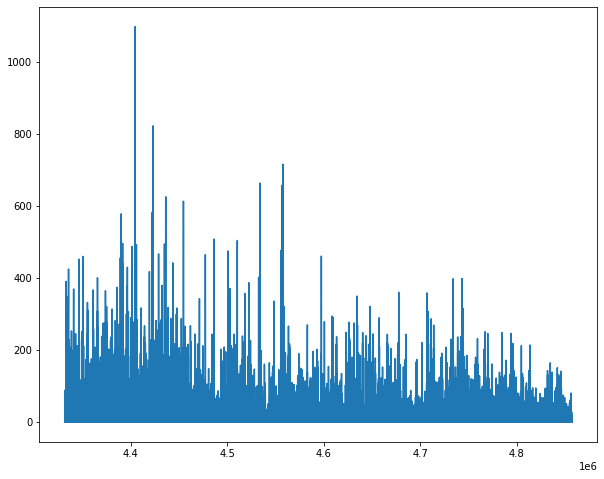

In [ ]:
plt.figure(figsize=[10,8])
df_rec_analise["Volume_(BTC)"].plot()

In [ ]:
#volumes relativamente pequenos foram mais comuns
df_rec_analise["Volume_(BTC)"].value_counts()

0.010000     152
1.000000     149
0.020000     102
0.100000      92
2.000000      87
            ... 
5.047474       1
3.127886       1
24.399714      1
9.447126       1
2.712831       1
Name: Volume_(BTC), Length: 512316, dtype: int64

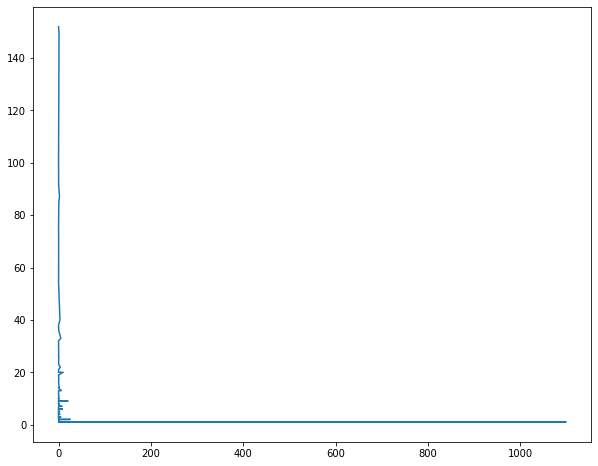

In [ ]:
plt.figure(figsize=[10,8])
df_rec_analise["Volume_(BTC)"].value_counts().plot()

In [ ]:
#em ordem crescente
df_rec_analise["Volume_(BTC)"].sort_values()

4762441       0.000002
4359213       0.000002
4350187       0.000003
4350263       0.000003
4412961       0.000003
              ...     
4557162     658.190065
4534231     663.636053
4557827     716.184407
4423382     822.866974
4404691    1098.349384
Name: Volume_(BTC), Length: 517943, dtype: float64

##Nota:
  O volume será maior quanto mais transações forem feitas.

##OBV - On Balance Volume

**Se o fechamento de hoje for superior ao de ontem**, então: OBV = OBV de ontem + Volume de hoje

**Se o volume de hoje for inferior ao de ontem, então**: OBV = OBV de ontem – Volume de hoje

**Se o fechamento de hoje for igual ao de ontem, então**: OBV = OBV de ontem

OBS: Como os dados são intraday os fechamentos são das janelas de 60s.

In [ ]:
#valores posteriores de fechamento com shift, cada linha corresponde ao valor anterior do ativo.
valor_close_anterior=df_rec_analise["Close"].shift(1)

In [ ]:
valor_close_anterior

4331776         NaN
4331777     6397.65
4331778     6405.06
4331779     6425.00
4331780     6426.53
             ...   
4857372    58714.31
4857373    58686.00
4857374    58685.81
4857375    58723.84
4857376    58760.59
Name: Close, Length: 517943, dtype: float64

In [ ]:
#Cálculo do OBV
df_rec_analise["OBV"]=np.where(df_rec_analise["Close"] > df_rec_analise["Close"].shift(1), +df_rec_analise["Volume_(BTC)"],
                               np.where(df_rec_analise["Close"] < df_rec_analise["Close"].shift(1), -df_rec_analise["Volume_(BTC)"], 0)).cumsum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_rec_analise["OBV"]

4331776       0.000000
4331777       4.053499
4331778      22.760873
4331779      29.925526
4331780      38.975776
              ...     
4857372   -4515.697324
4857373   -4522.992172
4857374   -4521.286490
4857375   -4520.566074
4857376   -4517.853243
Name: OBV, Length: 517943, dtype: float64

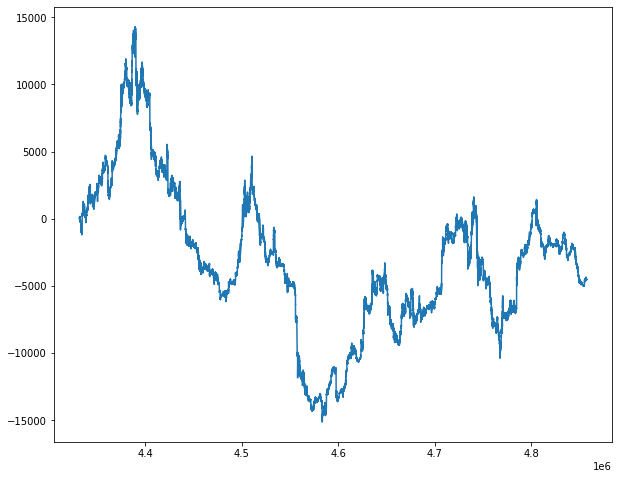

In [ ]:
plt.figure(figsize=[10,8])
df_rec_analise["OBV"].plot()

Text(0.5, 1.0, 'Divergência - Close/OBV')

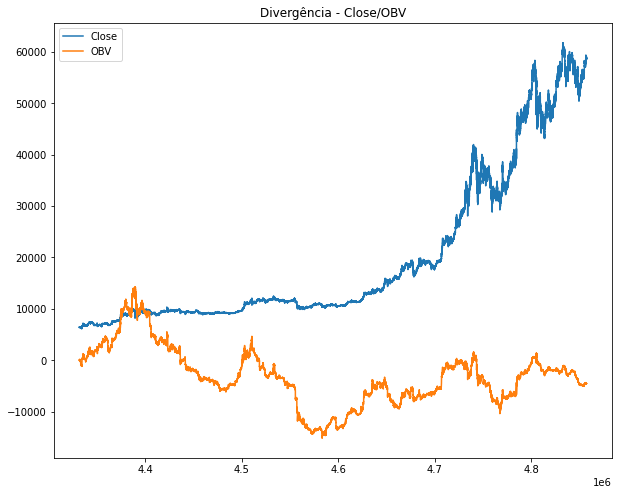

In [ ]:
#comportamento de fechamento e do OBV
plt.figure(figsize=[10,8])
plt.plot(df_rec_analise.Close)
plt.plot(df_rec_analise.OBV)
plt.legend(["Close", "OBV"])
plt.title("Divergência - Close/OBV")

In [ ]:
df_rec_analise.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price', 'OBV'],
      dtype='object')

#Volume_(Currency)

##Volume currency - Volume da moeda correspondente (dólar) transacionada nesta janela. Tipo float.


In [ ]:
df_rec_analise["Volume_(Currency)"]

4331776      2366.046893
4331777     25960.527673
4331778    120144.266210
4331779     46043.367355
4331780     58225.624105
               ...      
4857372     81259.372187
4857373    428158.146640
4857374    100117.070370
4857375     42332.958633
4857376    159417.751000
Name: Volume_(Currency), Length: 517943, dtype: float64

In [ ]:
#Informações estatísticas gerais
df_rec_analise["Volume_(Currency)"].describe()


count    5.179430e+05
mean     1.198988e+05
std      3.047994e+05
min      1.567074e-02
25%      6.548876e+03
50%      3.264111e+04
75%      1.086887e+05
max      1.390067e+07
Name: Volume_(Currency), dtype: float64

In [ ]:
#Verificando o tipo de dado
df_rec_analise["Volume_(Currency)"].dtypes

dtype('float64')

Text(0.5, 1.0, 'Volume de moeda transacionada')

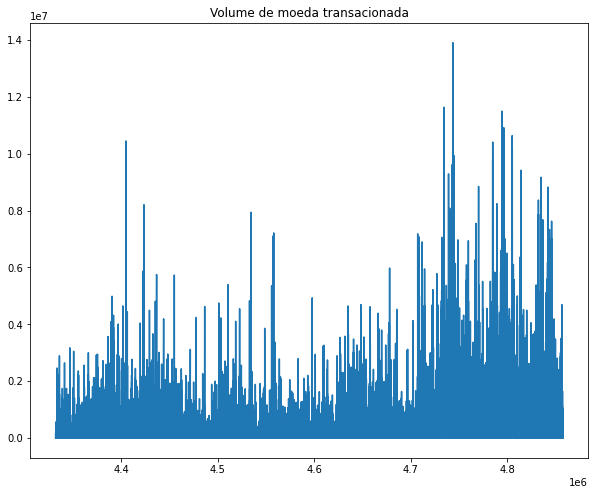

In [ ]:
#Visualisando graficamente
plt.figure(figsize=[10,8])
df_rec_analise["Volume_(Currency)"].plot()
plt.title("Volume de moeda transacionada")

In [ ]:
#